In [37]:
%run CoreCode.ipynb #must have CoreCode.inynb in the same directory as this notebook

In [40]:
def get_plot_thetas(Tmin, Tmax, Npoints, nsims, alpha, init_nodes, final_nodes):
    """Gets plots for different thetas (1,2 and 3), for the temperature range (Tmin, Tmix) and Npoints points,
    averaged over nsims simulations for alpha, init_nodes and final_nodes"""
    Temperatures = 10**(np.linspace(Tmin, Tmax, Npoints))
    m = 1
    
    THETA = np.array([1, 2, 3])

    colors = ['black', 'red', 'blue']
    labels = ['θ = 1', 'θ = 2', 'θ = 3']
    
    kmaxmts = []

    plt.figure(figsize=(10, 7))
    for t in range(len(THETA)):
        chem_pot = .0 * Temperatures
        kmaxmt = .0 * Temperatures
        for i in range(n_sims):
            aux_chem_pot = .0 * Temperatures
            aux_kmaxmt = .0 * Temperatures
            for j in range(len(aux_chem_pot)):
                aux_chem_pot[j], aux_kmaxmt[j] = simul(Temperatures[j], m, init_nodes, final_nodes, alpha, THETA[t])
            chem_pot += aux_chem_pot
            kmaxmt += aux_kmaxmt
        chem_pot /= n_sims
        kmaxmt /= n_sims
        kmaxmts += [kmaxmt]
        inter = interpolate.interp1d(Temperatures, np.abs(chem_pot),kind = 'cubic')
        plt.plot(Temperatures, inter(Temperatures), '--', color = colors[t])
        plt.plot(Temperatures, np.abs(chem_pot), '.', markersize = 8 ,color = colors[t], label = labels[t])


    plt.xlabel('$T$',fontsize=25)
    plt.ylabel('$|\mu|$',fontsize=25)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()
    
    
    plt.figure(figsize=(10, 7))
    for i in range(len(kmaxmts)):
        inter = interpolate.interp1d(Temperatures, kmaxmts[i],kind = 'cubic')
        plt.plot(Temperatures, inter(Temperatures), '--', color = colors[i])
        plt.plot(Temperatures, kmaxmts[i], '.', markersize = 8 ,color = colors[i], label = labels[i])
        
    plt.xlabel('$T$',fontsize=25)
    plt.ylabel('$k_{max}/mt$',fontsize=25)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()
    
    
def get_plot_alphas(Tmin, Tmax, Npoints, nsims, theta, init_nodes, final_nodes):
    """Gets plots for different alphas (1,2 and 3), for the temperature range (Tmin, Tmix) and Npoints points,
    averaged over nsims simulations for alpha, init_nodes and final_nodes"""
    Temperatures = 10**(np.linspace(Tmin, Tmax, Npoints))
    m = 1
    
    alphas = np.array([0, 0.5, 0.8])

    colors = ['black', 'red', 'blue']
    labels = ['α = 0', 'α = 0.5', 'α = 0.8']

    plt.figure(figsize=(10, 7))
    kmaxmts = []
    for t in range(len(alphas)):
        chem_pot = .0 * Temperatures
        kmaxmt = .0 * Temperatures
        for i in range(n_sims):
            aux_chem_pot = .0 * Temperatures
            aux_kmaxmt = .0 * Temperatures
            for j in range(len(aux_chem_pot)):
                (aux_chem_pot[j], aux_kmaxmt[j]) = simul(Temperatures[j], m, init_nodes, final_nodes, alphas[t], theta)
            chem_pot += aux_chem_pot
            kmaxmt += aux_kmaxmt
        chem_pot /= n_sims
        kmaxmt /= n_sims
        kmaxmts += [kmaxmt]
        inter = interpolate.interp1d(Temperatures, np.abs(chem_pot),kind = 'cubic')
        plt.plot(Temperatures, inter(Temperatures), '--', color = colors[t])
        plt.plot(Temperatures, np.abs(chem_pot), '.', markersize = 8 ,color = colors[t], label = labels[t])
        
    plt.xlabel('$T$',fontsize=25)
    plt.ylabel('$|\mu|$',fontsize=25)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 7))
    for i in range(len(kmaxmts)):
        inter = interpolate.interp1d(Temperatures, kmaxmts[i],kind = 'cubic')
        plt.plot(Temperatures, inter(Temperatures), '--', color = colors[i])
        plt.plot(Temperatures, kmaxmts[i], '.', markersize = 8 ,color = colors[i], label = labels[i])
        
    plt.xlabel('$T$',fontsize=25)
    plt.ylabel('$k_{max}/mt$',fontsize=25)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()

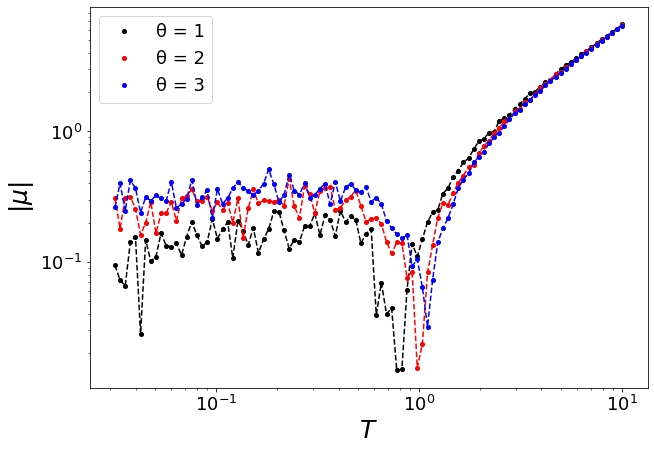

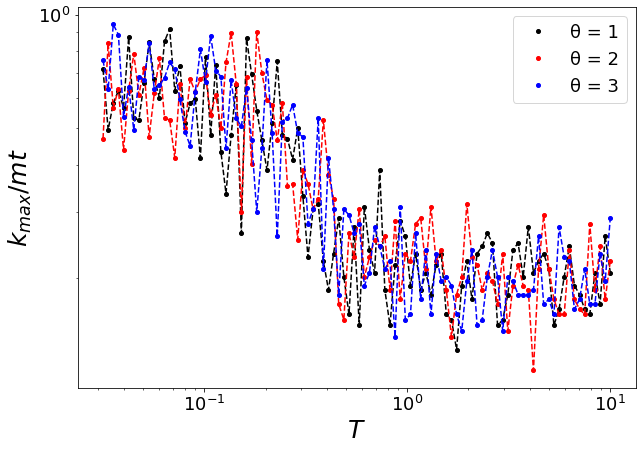

In [41]:
get_plot_thetas(-1.5, 1, 100, 2, 1, 3, 100) #example for N = 100 averaged over 2 times, for different thetas. 

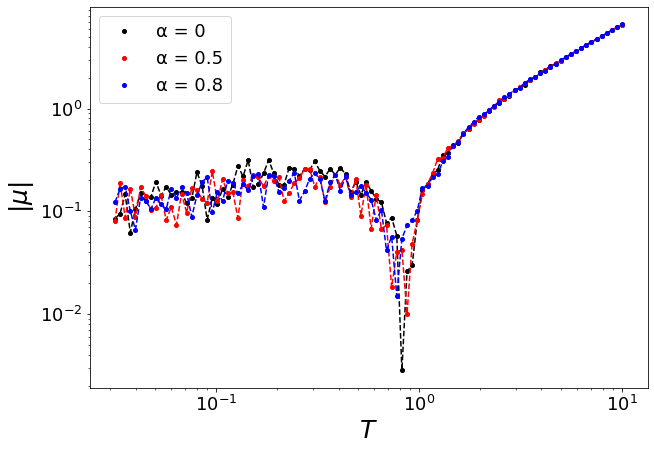

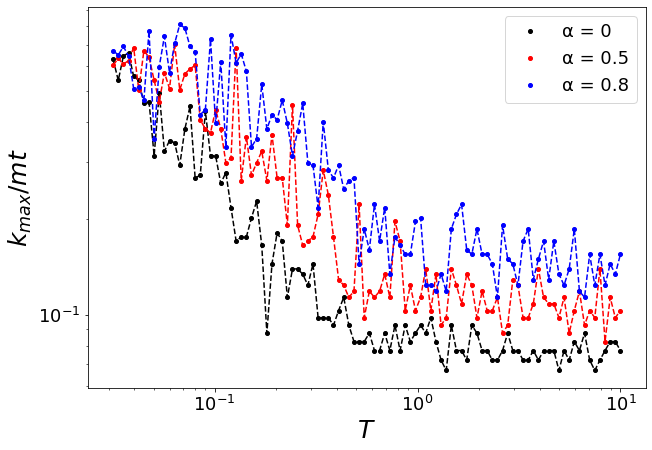

In [42]:
get_plot_alphas(-1.5, 1, 100, 2, 1, 3, 100), #example for N = 100 averaged over 2 times, for different alphas. 